In [2]:
import pandas as pd
from jupyter_server.terminal import initialize

dat = pd.read_excel('california.xlsx')


In [10]:
dat.head()
print(dat.shape)
daten = dat.dropna()
print(daten.shape)
daten = daten[['Längengrad', 'Breitengrad','Einkommen (Median)']]
daten.head()
daten.shape

(20640, 8)
(20433, 8)


(20433, 3)

In [12]:
from sklearn.cluster import KMeans

variability = []
K = range(1, 10)

for k in K:
    kMeanModel = KMeans(n_clusters=k)
    kMeanModel.fit(daten)
    variability.append(kMeanModel.inertia_)

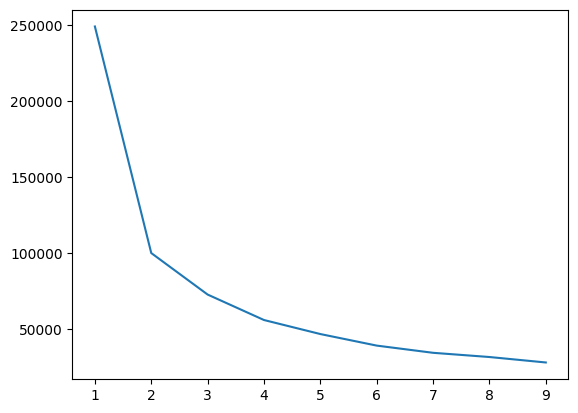

In [13]:
import matplotlib.pyplot as plt

plt.plot(K, variability)

In [39]:
kMeanModel = KMeans(n_clusters=4, init= initialize_clustercenter)
kMeanModel.fit(daten)

print(kMeanModel.cluster_centers_)
print(kMeanModel.n_iter_)
print(kMeanModel.labels_[:50])


[[-121.62709987   38.0678169     2.92114605]
 [-118.05609894   33.86498748    6.35018723]
 [-121.95261734   37.66295137    6.13432486]
 [-117.98894505   33.96803153    3.02086114]]
15
[0 3 0 3 2 0 3 0 1 0 0 3 0 3 3 3 3 2 0 3 0 1 2 0 0 0 2 1 3 2 3 1 1 0 3 3 3
 1 3 0 0 0 0 2 0 3 0 2 0 3]


In [ ]:
# Manuelle Berechnung ab hier

In [40]:
import numpy as np

daten [:4]

initialize_clustercenter = daten[:4]
initialize_clustercenter = np.array(initialize_clustercenter)
initialize_clustercenter

array([[-120.54  ,   38.41  ,    2.5667],
       [-117.1   ,   32.7   ,    3.6042],
       [-118.43  ,   37.4   ,    4.1576],
       [-116.5   ,   33.82  ,    2.1042]])

In [41]:
daten_array = np.array(daten)
daten_array[:10]

array([[-120.54  ,   38.41  ,    2.5667],
       [-117.1   ,   32.7   ,    3.6042],
       [-118.43  ,   37.4   ,    4.1576],
       [-116.5   ,   33.82  ,    2.1042],
       [-121.89  ,   37.23  ,    8.1988],
       [-124.14  ,   40.59  ,    2.178 ],
       [-120.44  ,   34.97  ,    3.7589],
       [-122.11  ,   37.7   ,    2.4206],
       [-118.5   ,   34.52  ,    5.9263],
       [-122.26  ,   37.83  ,    2.0978]])

In [42]:
actual_clustercenter = initialize_clustercenter

In [43]:
from numpy.linalg import norm

In [58]:
assigned_clustercenter = []

for i in daten_array:
    distance = []
    for j in actual_clustercenter:
        distance.append(norm(i - j))
    assigned_clustercenter.append(np.argmin(distance))

daten_cluster = np.column_stack((daten_array, np.array(assigned_clustercenter)))

daten_cluster_0 = daten_cluster[daten_cluster[:,3] == 0]
daten_cluster_1 = daten_cluster[daten_cluster[:,3] == 1]
daten_cluster_2 = daten_cluster[daten_cluster[:,3] == 2]
daten_cluster_3 = daten_cluster[daten_cluster[:,3] == 3]

clustercenter_cluster_0 = np.mean(daten_cluster_0, axis=0)
clustercenter_cluster_1 = np.mean(daten_cluster_1, axis=0)
clustercenter_cluster_2 = np.mean(daten_cluster_2, axis=0)
clustercenter_cluster_3 = np.mean(daten_cluster_3, axis=0)

actual_clustercenter = np.array([clustercenter_cluster_0, clustercenter_cluster_1, clustercenter_cluster_2, clustercenter_cluster_3])
actual_clustercenter = np.delete(actual_clustercenter, 3, axis=1)
print(actual_clustercenter)
print(kMeanModel.cluster_centers_)

[[-121.62709987   38.0678169     2.92114605]
 [-118.05609894   33.86498748    6.35018723]
 [-121.95261734   37.66295137    6.13432486]
 [-117.98894505   33.96803153    3.02086114]]
[[-121.62709987   38.0678169     2.92114605]
 [-118.05609894   33.86498748    6.35018723]
 [-121.95261734   37.66295137    6.13432486]
 [-117.98894505   33.96803153    3.02086114]]
